In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [433]:


def wrangle(filename, encoding=None, date_column=None, dropna_nan_columns=[],dropna_nan_columns0=False, change_column_name={}, drop_duplicates_columns=None ):
    global df
    df = pd.read_csv(filename, encoding=encoding)  #0. Load the dataset

    #1. Clean column names: remove spaces and convert to lowercase
    df.columns = df.columns.str.strip().str.lower()

    #2. convert space to _ in column names
    df.columns=df.columns.str.replace(' ','_')


    #3- Convert the specified column to datetime if provided
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column]) 

    #4- Drop all columns that contain only NaN values    
    if dropna_nan_columns0:
        df=df.dropna(axis=1 , how='all')    
    
    #5- Drop rows with NaN values in the specified columns
    if dropna_nan_columns:
        df.dropna(subset=dropna_nan_columns, inplace=True)
    
    #6- Rename columns if a mapping is provided
    if change_column_name:
        df.rename(columns=change_column_name, inplace=True)
    
    #7- Remove duplicate rows based on specified columns
    if drop_duplicates_columns:
        df.drop_duplicates(subset=drop_duplicates_columns, inplace=True)

    return df


In [434]:
df=wrangle('sales_data2.csv',date_column='orderdate')
df.sample(2)

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region
636,4682036e,2685bc37,770cf59e,Electronics,1,214.11,2024-06-29,43,Middle East
535,cb837dc2,fd49f191,5c8cb921,Home Appliances,7,203.43,2024-10-01,42,Africa


# حساب إجمالي الإيرادات لكل فئة مع الأخذ بعين الإعتبار الخصم

In [435]:
df['totalamount']=df['quantity']*(df['priceperunit'] - df['discount'])
df.head()

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region,totalamount
0,b77977ea,87c28c38,2d22e203,Books,10,220.94,2024-01-25,25,Middle East,1959.40
1,ff73b765,cebc31fd,82d23d88,Home Appliances,3,79.64,2024-11-16,4,Europe,226.92
2,656ad720,994c83b1,f028553d,Books,1,221.57,2024-08-13,7,Middle East,214.57
3,533f68b0,954fb95a,e3a03141,Clothing,5,474.48,2024-06-23,23,Middle East,2257.40
4,083f829e,1546f89d,5f148ef9,Home Appliances,8,331.56,2024-08-15,2,North America,2636.48


In [436]:
total_amount_by_category = df.groupby('category')['totalamount'].sum()
total_amount_by_category

category
Books             224867.04
Clothing          271724.31
Electronics       266179.21
Home Appliances   245274.85
Toys              191327.39
Name: totalamount, dtype: float64

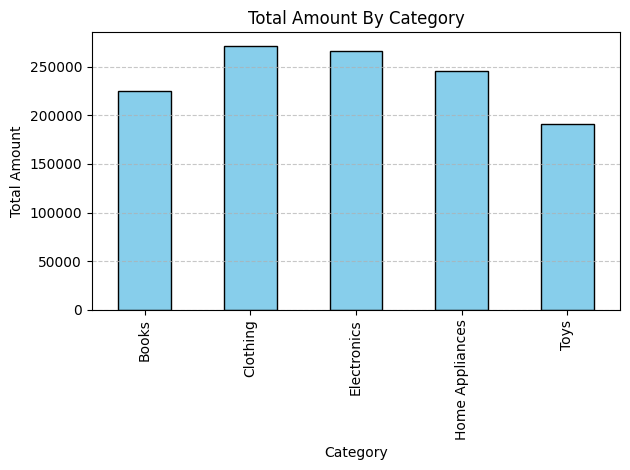

In [437]:
total_amount_by_category.plot(kind='bar' , x='category' , y='totalamount' , color='skyblue' ,edgecolor='black')
plt.title('Total Amount By Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# تحليل أداء المبيعات حسب المنطقة

In [438]:
df.head()

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region,totalamount
0,b77977ea,87c28c38,2d22e203,Books,10,220.94,2024-01-25,25,Middle East,1959.40
1,ff73b765,cebc31fd,82d23d88,Home Appliances,3,79.64,2024-11-16,4,Europe,226.92
2,656ad720,994c83b1,f028553d,Books,1,221.57,2024-08-13,7,Middle East,214.57
3,533f68b0,954fb95a,e3a03141,Clothing,5,474.48,2024-06-23,23,Middle East,2257.40
4,083f829e,1546f89d,5f148ef9,Home Appliances,8,331.56,2024-08-15,2,North America,2636.48


In [439]:
total_amount_by_region=df.groupby('region')['totalamount'].sum()
total_amount_by_region

region
Africa          221770.17
Asia            222218.34
Europe          289704.36
Middle East     233786.21
North America   231893.72
Name: totalamount, dtype: float64

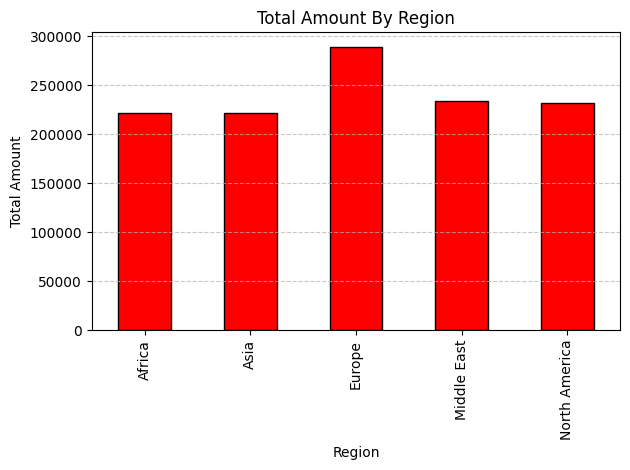

In [440]:
total_amount_by_region.plot(kind='bar' , x='region' , y='totalamount', color='red', edgecolor='black')
plt.title('Total Amount By Region')
plt.xlabel('Region')
plt.ylabel('Total Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# إستخراج أعلى عشر عملاء من حيث الإنفاق

In [441]:
df.head()

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region,totalamount
0,b77977ea,87c28c38,2d22e203,Books,10,220.94,2024-01-25,25,Middle East,1959.40
1,ff73b765,cebc31fd,82d23d88,Home Appliances,3,79.64,2024-11-16,4,Europe,226.92
2,656ad720,994c83b1,f028553d,Books,1,221.57,2024-08-13,7,Middle East,214.57
3,533f68b0,954fb95a,e3a03141,Clothing,5,474.48,2024-06-23,23,Middle East,2257.40
4,083f829e,1546f89d,5f148ef9,Home Appliances,8,331.56,2024-08-15,2,North America,2636.48


In [442]:
high_ten_customer=df.groupby('customerid')['totalamount'].sum().sort_values(ascending=False)
result=high_ten_customer.head(10)

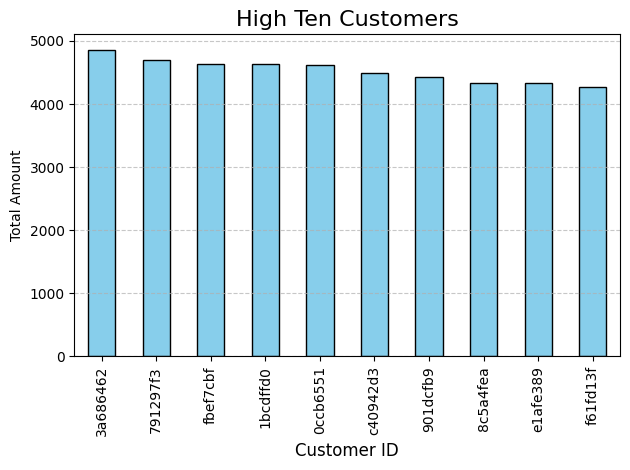

In [443]:
result.plot(kind='bar' , color='skyblue' , edgecolor='black')
plt.title('High Ten Customers',fontsize=16)
plt.xlabel('Customer ID',fontsize=12)
plt.ylabel('Total Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# هل هناك علاقة بين فئة المنتج والمنطقة (أي أن بعض الفئات تُباع أكثر في مناطق معينة)؟

In [444]:
df.head()

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region,totalamount
0,b77977ea,87c28c38,2d22e203,Books,10,220.94,2024-01-25,25,Middle East,1959.40
1,ff73b765,cebc31fd,82d23d88,Home Appliances,3,79.64,2024-11-16,4,Europe,226.92
2,656ad720,994c83b1,f028553d,Books,1,221.57,2024-08-13,7,Middle East,214.57
3,533f68b0,954fb95a,e3a03141,Clothing,5,474.48,2024-06-23,23,Middle East,2257.40
4,083f829e,1546f89d,5f148ef9,Home Appliances,8,331.56,2024-08-15,2,North America,2636.48


In [445]:
z=df[['category','region','quantity']]
a=z.groupby(['category','region'])['quantity'].sum().sort_index()
a

category         region       
Books            Africa           179
                 Asia             169
                 Europe           251
                 Middle East      195
                 North America    206
Clothing         Africa           246
                 Asia             219
                 Europe           273
                 Middle East      242
                 North America    224
Electronics      Africa           245
                 Asia             237
                 Europe           285
                 Middle East      201
                 North America    204
Home Appliances  Africa           220
                 Asia             227
                 Europe           260
                 Middle East      191
                 North America    244
Toys             Africa           154
                 Asia             224
                 Europe           154
                 Middle East      182
                 North America    203
Name: quantity, dty

In [446]:


fig = px.bar(
    data_frame=z,
    x='category',
    y='quantity',
    color='region',
    title='Sales Distribution by Category and Region',
    labels={'category': 'Product Category', 'quantity': 'Quantity Sold'}
)

fig.show()



In [447]:
fig.write_html("interactive_chart.html")


# تحليل العلاقة بين المناطق وفئات المنتجات

تم تحليل البيانات لمعرفة ما إذا كانت هناك علاقة بين **المناطق (Region)** و**فئات المنتجات (Category)**، أي أن بعض الفئات تُباع بشكل أكبر في مناطق معينة. بناءً على الجدول والمخطط، نستعرض النتائج:

---

## **نتائج التحليل**

### 1. **فئة الكتب (Books)**:
- **أوروبا (Europe)** هي الأعلى مبيعًا بفارق كبير (251 وحدة).
- **أمريكا الشمالية (North America)** تأتي في المرتبة الثانية (206 وحدة).
- **الشرق الأوسط (Middle East)** وأفريقيا (Africa) لديهما مبيعات معتدلة (195 و 179 وحدة على التوالي).
- **آسيا (Asia)** لديها المبيعات الأقل (169 وحدة).

### 2. **فئة الملابس (Clothing)**:
- **أوروبا (Europe)** تتصدر المبيعات (273 وحدة).
- **أفريقيا (Africa)** تأتي ثانيًا (246 وحدة).
- **أمريكا الشمالية (North America)** والشرق الأوسط (Middle East) بمبيعات متقاربة (224 و 242 وحدة).
- **آسيا (Asia)** لديها المبيعات الأقل (219 وحدة).

### 3. **الإلكترونيات (Electronics)**:
- **أوروبا (Europe)** تسجل أعلى مبيعات لهذه الفئة (285 وحدة).
- **أفريقيا (Africa)** تليها (245 وحدة).
- **آسيا (Asia)** وأمريكا الشمالية (North America) متقاربتان (237 و 204 وحدة).
- **الشرق الأوسط (Middle East)** يأتي أخيرًا (201 وحدة).

### 4. **الأجهزة المنزلية (Home Appliances)**:
- **أوروبا (Europe)** تتصدر أيضًا هذه الفئة (260 وحدة).
- **أمريكا الشمالية (North America)** تحتل المرتبة الثانية (244 وحدة).
- **آسيا (Asia)** وأفريقيا (Africa) بمبيعات متوسطة (227 و 220 وحدة).
- **الشرق الأوسط (Middle East)** لديه المبيعات الأقل (191 وحدة).

### 5. **الألعاب (Toys)**:
- **آسيا (Asia)** تسجل أعلى مبيعات لهذه الفئة (224 وحدة).
- **أمريكا الشمالية (North America)** تأتي في المرتبة الثانية (203 وحدة).
- **الشرق الأوسط (Middle East)** وأفريقيا (Africa) لديهما مبيعات منخفضة نسبيًا (182 و 154 وحدة).
- **أوروبا (Europe)** تسجل أقل المبيعات لنفس الفئة (154 وحدة).

---

## **الاستنتاجات**
1. **فئة الكتب (Books)** وفئة **الإلكترونيات (Electronics)** تسجلان أعلى مبيعات في **أوروبا**.
2. **فئة الألعاب (Toys)** هي الأكثر مبيعًا في **آسيا**.
3. **أفريقيا** تبرز كمساهم جيد في مبيعات فئة **الإلكترونيات (Electronics)**.
4. **الشرق الأوسط** يسجل مبيعات أقل نسبيًا في معظم الفئات مقارنة بالمناطق الأخرى.
5. هناك علاقة واضحة بين بعض الفئات والمناطق، مثل هيمنة **أوروبا** على فئات مثل الكتب والإلكترونيات.

---

## **التوصيات للعملاء**
1. **تعزيز التواجد في أوروبا**:
   - ركزوا على فئات مثل **الكتب** و**الإلكترونيات** حيث تحقق أوروبا أعلى المبيعات.
2. **زيادة التسويق للألعاب في آسيا**:
   - آسيا تسجل أعلى مبيعات للألعاب، مما يعني فرصة لتوسيع الحصة السوقية.
3. **تحسين استراتيجيات البيع في الشرق الأوسط**:
   - يوصى بدراسة سلوك العملاء لتحسين مبيعات جميع الفئات، خاصة **الأجهزة المنزلية**.

-



<span style="color: orange; font-size: 50px;">تحليل التوزيع الزمني للمبيعات خلال العام ✅</span>


In [448]:
df.head()

,orderid,customerid,productid,category,quantity,priceperunit,orderdate,discount,region,totalamount
0,b77977ea,87c28c38,2d22e203,Books,10,220.94,2024-01-25,25,Middle East,1959.40
1,ff73b765,cebc31fd,82d23d88,Home Appliances,3,79.64,2024-11-16,4,Europe,226.92
2,656ad720,994c83b1,f028553d,Books,1,221.57,2024-08-13,7,Middle East,214.57
3,533f68b0,954fb95a,e3a03141,Clothing,5,474.48,2024-06-23,23,Middle East,2257.40
4,083f829e,1546f89d,5f148ef9,Home Appliances,8,331.56,2024-08-15,2,North America,2636.48


In [449]:
date=df.set_index('orderdate')
total_amount_per_year=date['totalamount'].resample('1ME').sum()
total_amount_per_year

orderdate
2024-01-31    41250.26
2024-02-29    96300.04
2024-03-31    92704.54
2024-04-30   110752.13
2024-05-31   102224.45
2024-06-30    94726.31
2024-07-31   108706.40
2024-08-31    92431.66
2024-09-30    94228.87
2024-10-31   124881.74
2024-11-30    88441.46
2024-12-31    99719.50
2025-01-31    53005.44
Freq: ME, Name: totalamount, dtype: float64

<Axes: xlabel='orderdate'>

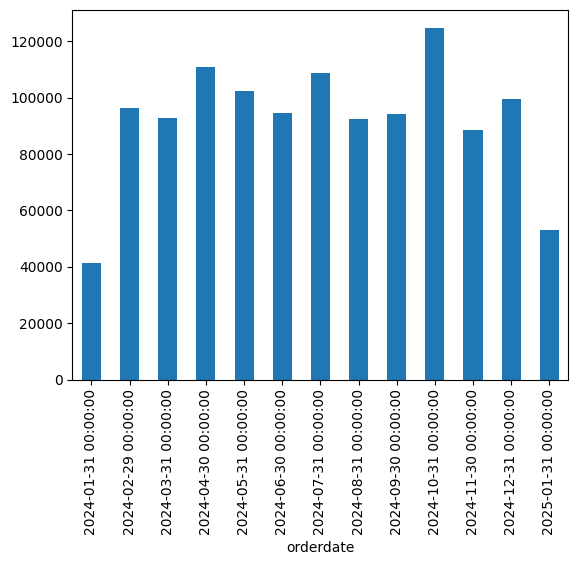

In [450]:
total_amount_per_year.plot(kind='bar')

In [451]:
fig.write_html("interactive_chart.html")
